In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_master = pd.read_excel("master_file_final.xlsx")
df_appts = pd.read_excel("allapptslinac2010-2020.xlsx")

## Emergency 1

In [3]:
df_emergency = df_master[df_master['Category_x']=='Emergency 1']
#df_emergency = df_master[df_master['Category_x']=='Planned Delay 3']
df_emergency['Year'] = df_emergency['CreatedDate'].dt.year
df_emergency['Month'] = df_emergency['CreatedDate'].dt.month
# create YearMonth column
df_emergency['dateInt']= df_emergency['Year'].astype(str) + df_emergency['Month'].astype(str).str.zfill(2)
df_emergency['YearMonth'] = pd.to_datetime(df_emergency['dateInt'], format='%Y%m')
#df_emergency

/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,MRN,CreatedDate,CreatedTime,ActivatedDate,ActivatedTime,SiteGroup,Diagnosis,Category_x,PlanCreateDate,PlanCreateTime,...,Tx-TxBook,Tx-PlanCompl,Tx-PlanPrompt,Tx-PlanReview,PlanWait,Unnamed: 86,Year,Month,dateInt,YearMonth
26,22300,2020-10-02,1999-11-30 11:40:22,2020-10-02,1999-11-30 11:43:55,BREAST,Mets to Bone - Ca Breast,Emergency 1,2020-10-02,1999-11-30 11:42:21,...,0,NaN,NaN,NaN,NaN,NaN,2020,10,202010,2020-10-01
61,55835,2014-12-24,1999-11-30 13:20:48,2014-12-24,1999-11-30 13:25:44,LUNG,ca lung NSCLC-left,Emergency 1,2014-12-24,1999-11-30 13:24:43,...,0,NaN,NaN,NaN,NaN,NaN,2014,12,201412,2014-12-01
71,63082,2014-08-12,1999-11-30 14:23:42,2014-08-12,1999-11-30 14:26:49,GENITOURINARY(GU),Ca Prostate,Emergency 1,2014-08-12,1999-11-30 14:25:45,...,1,NaN,NaN,NaN,NaN,NaN,2014,8,201408,2014-08-01
117,89025,2010-03-10,1999-11-30 22:16:33,2010-03-10,1999-11-30 22:20:52,BREAST,Mets Misc - Ca Breast,Emergency 1,2010-03-10,1999-11-30 22:19:07,...,-1,NaN,NaN,NaN,NaN,NaN,2010,3,201003,2010-03-01
123,91224,2012-01-20,1999-11-30 13:51:32,2012-01-20,1999-11-30 13:56:56,ENT (HEAD & NECK),Oral Cavity,Emergency 1,2012-01-20,1999-11-30 13:54:55,...,1,NaN,NaN,NaN,NaN,NaN,2012,1,201201,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57736,6273510,2014-03-19,1999-11-30 13:53:14,2014-03-19,1999-11-30 13:58:14,LUNG,ca lung SCCL-left,Emergency 1,2014-03-19,1999-11-30 13:57:53,...,0,NaN,NaN,NaN,NaN,NaN,2014,3,201403,2014-03-01
57738,6282070,2015-02-14,1999-11-30 12:30:45,2015-02-14,1999-11-30 12:33:40,BREAST,Ca Breast NOS (excludes Skin),Emergency 1,2015-02-14,1999-11-30 12:31:53,...,0,NaN,NaN,NaN,NaN,NaN,2015,2,201502,2015-02-01
57740,6289611,2016-03-18,1999-11-30 17:30:24,2016-03-18,1999-11-30 17:43:07,LUNG,mets bone - ca lung,Emergency 1,2016-03-18,1999-11-30 17:38:18,...,1,NaN,NaN,NaN,NaN,NaN,2016,3,201603,2016-03-01
57747,6327819,2011-04-08,1999-11-30 11:46:15,2011-04-08,1999-11-30 11:54:22,GI UPPER,Ca Stomach,Emergency 1,2011-04-08,1999-11-30 11:48:27,...,0,NaN,NaN,NaN,NaN,NaN,2011,4,201104,2011-04-01


In [8]:
# for the time on CTs
df_CTmins = df_emergency.groupby([df_emergency['SimLocation'],df_emergency['YearMonth']]
                                )['SimApptDuration'].agg('sum').reset_index()
df_CT_recent_mean = df_CTmins.groupby(['SimLocation','YearMonth']).agg('sum').reset_index()
df_CT_recent_mean['avgDailyReserve']=df_CT_recent_mean['SimApptDuration']/20
df_CT_recent_mean

,SimLocation,YearMonth,SimApptDuration,avgDailyReserve
0,CTSim1-PET,2010-01-01,90,4.50
1,CTSim1-PET,2010-02-01,30,1.50
2,CTSim1-PET,2010-05-01,120,6.00
3,CTSim1-PET,2010-06-01,30,1.50
4,CTSim1-PET,2010-07-01,30,1.50
...,...,...,...,...
408,CTSim4,2020-08-01,60,3.00
409,CTSim4,2020-09-01,90,4.50
410,CTSim4,2020-10-01,30,1.50
411,CTSim4,2020-11-01,120,6.00


In [5]:
df_appts['Year'] = df_appts['ApptDate'].dt.year
df_appts['Month'] = df_appts['ApptDate'].dt.month
df_totalmins = df_appts.groupby([df_appts['MRN'],df_appts['TxUnit'],df_appts['Year'],df_appts['Month']]
                               )['Duration'].agg('sum').reset_index()

# every patient, total mins on each machine per month
df_totalmins['Year']=df_totalmins['Year'].astype(int)
df_totalmins['Month']=df_totalmins['Month'].astype(int)
# create YearMonth column
df_totalmins['dateInt']= df_totalmins['Year'].astype(str) + df_totalmins['Month'].astype(str).str.zfill(2)
df_totalmins['YearMonth'] = pd.to_datetime(df_totalmins['dateInt'], format='%Y%m')
df_totalmins

,MRN,TxUnit,Year,Month,Duration,dateInt,YearMonth
0,99.0,WV16,2019,8,30.0,201908,2019-08-01
1,2918.0,SA04,2015,12,15.0,201512,2015-12-01
2,2918.0,WA15,2015,12,15.0,201512,2015-12-01
3,5723.0,NA10,2013,8,285.0,201308,2013-08-01
4,5723.0,NA10,2013,9,270.0,201309,2013-09-01
...,...,...,...,...,...,...,...
86322,6392009.0,EV06,2019,6,195.0,201906,2019-06-01
86323,6392032.0,EA05,2020,8,80.0,202008,2020-08-01
86324,6392032.0,NA09,2020,7,20.0,202007,2020-07-01
86325,6392032.0,SA04,2020,7,290.0,202007,2020-07-01


In [6]:
df_PDMins = df_totalmins.merge(df_emergency, on=['MRN','Year'])
df_PDMins[['MRN','Category_x','Duration','TxUnit_x','YearMonth_x']].sort_values(by=['YearMonth_x'])
# mins every month per unit per patient for emergency

,MRN,Category_x,Duration,TxUnit_x,YearMonth_x
707,3271421.0,Emergency 1,15.0,SV01,2011-10-01
974,3976872.0,Emergency 1,15.0,SV01,2011-11-01
931,3911173.0,Emergency 1,45.0,SV01,2011-11-01
953,3950084.0,Emergency 1,105.0,SV01,2012-01-01
350,2340670.0,Emergency 1,45.0,SV01,2012-01-01
...,...,...,...,...,...
2009,4813373.0,Emergency 1,30.0,NA12,2020-12-01
274,2083363.0,Emergency 1,105.0,EA07,2020-12-01
649,3181214.0,Emergency 1,50.0,WA15,2020-12-01
48,453814.0,Emergency 1,40.0,WA17,2020-12-01


In [7]:
df_PD_mins_unit = df_PDMins.groupby([df_PDMins['TxUnit_x'], df_PDMins['YearMonth_x']]
                                      )['Duration'].sum().reset_index()
df_PD_mins_unit # total mins per unit per month for emergency

,TxUnit_x,YearMonth_x,Duration
0,EA05,2013-12-01,15.0
1,EA05,2014-01-01,30.0
2,EA05,2014-02-01,20.0
3,EA05,2014-03-01,20.0
4,EA05,2014-07-01,135.0
...,...,...,...
733,WV16,2019-12-01,60.0
734,WV16,2020-01-01,50.0
735,WV16,2020-04-01,295.0
736,WV16,2020-07-01,45.0


In [50]:
'''temp = linac_mins.merge(df_EA07[['YearMonth_x','Duration']], left_on=['date'], right_on=['YearMonth_x'], how='outer')
temp = temp[['date','Duration']]
i='name'
temp.rename(columns={"Duration": i})'''

,date,name
0,2013-12-01,NaN
1,2014-01-01,NaN
2,2014-02-01,NaN
3,2014-03-01,NaN
4,2014-07-01,NaN
...,...,...
101,2013-04-01,NaN
102,2012-07-01,NaN
103,2012-11-01,NaN
104,2012-12-01,NaN


In [55]:
'''df_EA07 = df_PD_mins_unit[df_PD_mins_unit['TxUnit_x']=='EA07']
#df_EA07.to_excel('E_EA07.xlsx')
df_EA07.head()'''

,TxUnit_x,YearMonth_x,Duration
55,EA07,2014-10-01,490.0
56,EA07,2014-12-01,290.0
57,EA07,2015-01-01,30.0
58,EA07,2015-03-01,90.0
59,EA07,2015-04-01,30.0


In [65]:
'''all_dates = df_PD_mins_unit['YearMonth_x'].unique()
linac_mins = pd.DataFrame(columns=['date'])
linac_mins['date']=all_dates
linac_mins'''

,date
0,2013-12-01
1,2014-01-01
2,2014-02-01
3,2014-03-01
4,2014-07-01
...,...
101,2013-04-01
102,2012-07-01
103,2012-11-01
104,2012-12-01


In [84]:
len(df_PD_mins_unit['YearMonth_x'].unique())

106

In [74]:
# first create am empty df with dates only
all_dates = df_PD_mins_unit['YearMonth_x'].unique()
linac_mins = pd.DataFrame(columns=['date'])
linac_mins['date']=all_dates

linac_units = df_PD_mins_unit['TxUnit_x'].unique()
for i in linac_units:
    
    df_monthly_mins = df_PD_mins_unit[df_PD_mins_unit['TxUnit_x']==i] # for this unit i
    temp = linac_mins.merge(df_monthly_mins[['YearMonth_x','Duration']], left_on=['date'], right_on=['YearMonth_x'], how='outer')
    # rename this list of Duration to unit name i
    temp.rename(columns={"Duration": i}, inplace=True)
    
    result = pd.concat([linac_mins, temp[i]], axis=1).reindex(linac_mins.index)
    linac_mins = result
    
    

In [75]:
#linac_mins.to_excel('linac_mins.xlsx')

In [78]:
CT_mins = pd.DataFrame(columns=['date'])
CT_mins['date']=all_dates

CT_units = df_CT_recent_mean['SimLocation'].unique()
for i in CT_units:
    df_monthly_mins = df_CT_recent_mean[df_CT_recent_mean['SimLocation']==i] # for this unit i
    temp = CT_mins.merge(df_monthly_mins[['YearMonth','SimApptDuration']], left_on=['date'], right_on=['YearMonth'], 
                         how='outer')
    # rename this list of Duration to unit name i
    temp.rename(columns={"SimApptDuration": i}, inplace=True)
    
    result = pd.concat([CT_mins, temp[i]], axis=1).reindex(CT_mins.index)
    CT_mins = result

In [83]:
len(all_dates)

106

In [82]:
CT_mins.shape

(106, 5)

In [81]:
result.shape

(106, 5)

In [80]:
# output the YearMonth CT mins
#CT_mins.to_excel('CT_mins_emergency.xlsx')

In [77]:
df_CT_recent_mean.head()

,SimLocation,YearMonth,SimApptDuration,avgDailyReserve
0,CTSim1-PET,2010-01-01,90,4.5
1,CTSim1-PET,2010-02-01,30,1.5
2,CTSim1-PET,2010-05-01,120,6.0
3,CTSim1-PET,2010-06-01,30,1.5
4,CTSim1-PET,2010-07-01,30,1.5


In [157]:
df_linac_recent = df_PD_mins_unit[(df_PD_mins_unit['YearMonth_x']>='2014-01-01')&
                                  (df_PD_mins_unit['YearMonth_x']<='2019-12-01')]
df_avg_PD = df_linac_recent.groupby(df_linac_recent['TxUnit_x'])['Duration'].agg('sum').reset_index()
# monthly average (avg of 2 months)
df_avg_PD['dailyReserve']=df_avg_PD['Duration']/20
df_avg_PD # avg monthly mins per unit and daily mins to be reserved

,TxUnit_x,Duration,dailyReserve
0,EA05,6515.0,325.75
1,EA07,5520.0,276.00
2,EA08,6765.0,338.25
3,EV06,2835.0,141.75
4,NA09,6725.0,336.25
5,NA10,10865.0,543.25
6,NA11,2145.0,107.25
7,NA12,36870.0,1843.50
8,SA04,11055.0,552.75
9,SV01,4000.0,200.00


## PD

## Std3 & Urg2

In [127]:
#df_emergency = df_master[(df_master['Category_x']=='Standard 3')|(df_master['Category_x']=='Urgent 2')]
#df_emergency = df_master[df_master['Category_x']=='Emergency 1']
df_emergency = df_master[(df_master['Category_x']=='Planned Delay 3')|(df_master['Category_x']=='Emergency 1')]
df_emergency['Year'] = df_emergency['CreatedDate'].dt.year
df_emergency['Month'] = df_emergency['CreatedDate'].dt.month
# create YearMonth column
df_emergency['dateInt']= df_emergency['Year'].astype(str) + df_emergency['Month'].astype(str).str.zfill(2)
df_emergency['YearMonth'] = pd.to_datetime(df_emergency['dateInt'], format='%Y%m')
df_emergency

/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,MRN,CreatedDate,CreatedTime,ActivatedDate,ActivatedTime,SiteGroup,Diagnosis,Category_x,PlanCreateDate,PlanCreateTime,...,Tx-TxBook,Tx-PlanCompl,Tx-PlanPrompt,Tx-PlanReview,PlanWait,Unnamed: 86,Year,Month,dateInt,YearMonth
9,9284,2012-12-19,1999-11-30 11:24:38,2012-12-19,1999-11-30 11:26:59,GYNAE,Uterine,Planned Delay 3,2012-12-19,1999-11-30 11:25:30,...,11,NaN,NaN,NaN,NaN,NaN,2012,12,201212,2012-12-01
20,19009,2014-07-09,1999-11-30 13:59:00,2014-07-09,1999-11-30 14:07:07,ENT (HEAD & NECK),Oral Cavity,Planned Delay 3,2014-07-09,1999-11-30 14:03:22,...,18,NaN,NaN,NaN,NaN,NaN,2014,7,201407,2014-07-01
26,22300,2020-10-02,1999-11-30 11:40:22,2020-10-02,1999-11-30 11:43:55,BREAST,Mets to Bone - Ca Breast,Emergency 1,2020-10-02,1999-11-30 11:42:21,...,0,NaN,NaN,NaN,NaN,NaN,2020,10,202010,2020-10-01
27,24105,2020-05-29,1999-11-30 15:39:28,2020-05-29,1999-11-30 15:42:10,BREAST,"Ca Breast, Upper-outer Quadrant",Planned Delay 3,2020-05-29,1999-11-30 15:41:19,...,6,NaN,NaN,NaN,NaN,NaN,2020,5,202005,2020-05-01
30,25735,2011-02-22,1999-11-30 16:09:11,2011-02-22,1999-11-30 16:17:01,GI UPPER,NaN,Planned Delay 3,2011-02-22,1999-11-30 16:12:55,...,1,NaN,NaN,NaN,NaN,NaN,2011,2,201102,2011-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57742,6299006,2013-04-30,1999-11-30 14:36:18,2013-04-30,1999-11-30 14:54:19,GI UPPER,Ca Stomach,Planned Delay 3,2013-04-30,1999-11-30 14:36:57,...,42,NaN,NaN,NaN,NaN,NaN,2013,4,201304,2013-04-01
57743,6299380,2014-03-10,1999-11-30 16:15:32,2014-03-10,1999-11-30 16:17:24,LYMPHOMA,U: MDS,Planned Delay 3,2014-03-10,1999-11-30 16:16:33,...,22,NaN,NaN,NaN,NaN,NaN,2014,3,201403,2014-03-01
57747,6327819,2011-04-08,1999-11-30 11:46:15,2011-04-08,1999-11-30 11:54:22,GI UPPER,Ca Stomach,Emergency 1,2011-04-08,1999-11-30 11:48:27,...,0,NaN,NaN,NaN,NaN,NaN,2011,4,201104,2011-04-01
57754,6351835,2012-03-17,1999-11-30 14:56:50,2012-03-17,1999-11-30 14:59:20,SKIN,Melanoma,Emergency 1,2012-03-17,1999-11-30 14:58:09,...,0,NaN,NaN,NaN,NaN,NaN,2012,3,201203,2012-03-01


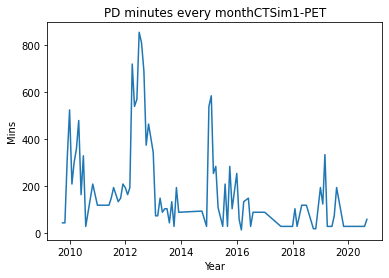

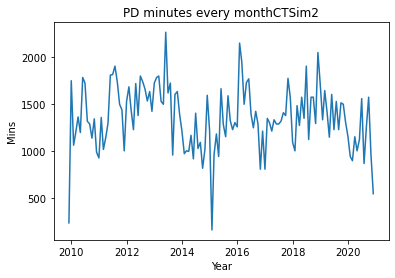

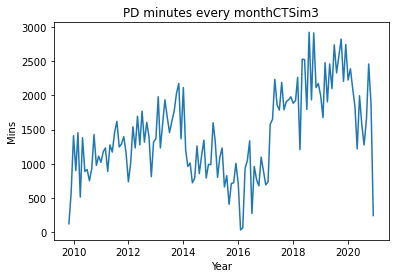

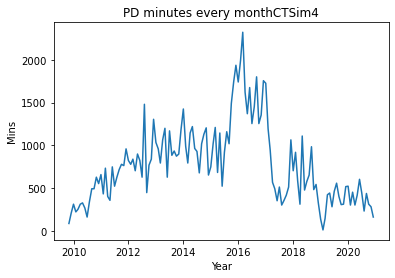

In [128]:
### CTs mins booked on each CT for planned delay patients
df_CTmins = df_emergency.groupby([df_emergency['SimLocation'],df_emergency['YearMonth']]
                                )['SimApptDuration'].agg('sum').reset_index()
                                                                                                            
CTs = df_CTmins['SimLocation'].unique()
for u in CTs:
    y = df_CTmins[df_CTmins['SimLocation']==u]['SimApptDuration']
    x = df_CTmins[df_CTmins['SimLocation']==u]['YearMonth']

    plt.plot(x, y)
    plt.xlabel('Year')
    plt.ylabel('Mins')
    plt.title('PD minutes every month'+u)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.show()

In [129]:
df_CTmins[df_CTmins['YearMonth']=='2020-01-01']
# momthly total minutes on CTs

,SimLocation,YearMonth,SimApptDuration
206,CTSim2,2020-01-01,1160
340,CTSim3,2020-01-01,2225
474,CTSim4,2020-01-01,525


In [115]:
df_emergency[df_emergency['YearMonth']=='2020-01-01']['SimApptDuration'].sum()

3700

In [146]:
df_CT_recent_total = df_CTmins[(df_CTmins['YearMonth']>='2019-12-01')&(df_CTmins['YearMonth']<'2020-03-01')]
df_CT_recent_mean = df_CT_recent_total.groupby(['SimLocation']).agg('mean').reset_index()
df_CT_recent_mean['dailyReserve']=df_CT_recent_mean['SimApptDuration']/20
df_CT_recent_mean
# total mins and daily mins to be reserved


,SimLocation,SimApptDuration,dailyReserve
0,CTSim2,1138.333333,56.916667
1,CTSim3,2453.333333,122.666667
2,CTSim4,450.000000,22.500000


In [131]:
df_appts[(df_appts['Year']==2020)&(df_appts['Month']==8)&(df_appts['TxUnit']=='NA12')]

,MRN,TxUnit,ApptStatus,Duration,ApptDate,ApptTime_o,ApptTime_i,ApptTime,Year,Month
256,22300.0,NA12,"SC,S",30.0,2020-08-12,13:10:00,13:10:00,13:10:00,2020.0,8.0
257,22300.0,NA12,C,15.0,2020-08-13,13:55:00,13:55:00,13:55:00,2020.0,8.0
258,22300.0,NA12,C,15.0,2020-08-14,13:30:00,13:30:00,13:30:00,2020.0,8.0
259,22300.0,NA12,C,15.0,2020-08-17,13:10:00,13:10:00,13:10:00,2020.0,8.0
260,22300.0,NA12,FC,15.0,2020-08-18,12:40:00,12:40:00,12:40:00,2020.0,8.0
...,...,...,...,...,...,...,...,...,...,...
545223,6033649.0,NA12,C,15.0,2020-08-14,16:45:00,16:45:00,16:45:00,2020.0,8.0
545224,6033649.0,NA12,FC,15.0,2020-08-17,13:25:00,13:25:00,13:25:00,2020.0,8.0
546152,6066020.0,NA12,SC,30.0,2020-08-26,16:30:00,16:30:00,16:30:00,2020.0,8.0
547786,6120761.0,NA12,FC,20.0,2020-08-27,8:20,08:20:00,08:20:00,2020.0,8.0


In [132]:
df_appts

,MRN,TxUnit,ApptStatus,Duration,ApptDate,ApptTime_o,ApptTime_i,ApptTime,Year,Month
0,99.0,WV16,NaN,30.0,2019-08-13,14:50:00,14:50:00,14:50:00,2019.0,8.0
1,2918.0,SA04,C,15.0,2015-12-28,19:15:00,19:15:00,19:15:00,2015.0,12.0
2,2918.0,WA15,FC,15.0,2015-12-29,14:20:00,14:20:00,14:20:00,2015.0,12.0
3,5723.0,NA10,"SC,S",30.0,2013-08-07,11:10:00,11:10:00,11:10:00,2013.0,8.0
4,5723.0,NA10,C,15.0,2013-08-08,8:45,08:45:00,08:45:00,2013.0,8.0
...,...,...,...,...,...,...,...,...,...,...
561573,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0.548611,NaN,NaN
561574,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0.5,NaN,NaN
561575,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0.583333,NaN,NaN
561576,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0.534722,NaN,NaN


In [133]:
df_appts['Year'] = df_appts['ApptDate'].dt.year
df_appts['Month'] = df_appts['ApptDate'].dt.month


df_totalmins = df_appts.groupby([df_appts['MRN'],df_appts['TxUnit'],df_appts['Year'],df_appts['Month']]
                               )['Duration'].agg('sum').reset_index()

# every patient, total mins on each machine per month
df_totalmins['Year']=df_totalmins['Year'].astype(int)
df_totalmins['Month']=df_totalmins['Month'].astype(int)
# create YearMonth column
df_totalmins['dateInt']= df_totalmins['Year'].astype(str) + df_totalmins['Month'].astype(str).str.zfill(2)
df_totalmins['YearMonth'] = pd.to_datetime(df_totalmins['dateInt'], format='%Y%m')
df_totalmins

,MRN,TxUnit,Year,Month,Duration,dateInt,YearMonth
0,99.0,WV16,2019,8,30.0,201908,2019-08-01
1,2918.0,SA04,2015,12,15.0,201512,2015-12-01
2,2918.0,WA15,2015,12,15.0,201512,2015-12-01
3,5723.0,NA10,2013,8,285.0,201308,2013-08-01
4,5723.0,NA10,2013,9,270.0,201309,2013-09-01
...,...,...,...,...,...,...,...
86322,6392009.0,EV06,2019,6,195.0,201906,2019-06-01
86323,6392032.0,EA05,2020,8,80.0,202008,2020-08-01
86324,6392032.0,NA09,2020,7,20.0,202007,2020-07-01
86325,6392032.0,SA04,2020,7,290.0,202007,2020-07-01


In [134]:
df_PDMins = df_totalmins.merge(df_emergency, on=['MRN','Year'])
df_PDMins[['MRN','Category_x','Duration','TxUnit_x','YearMonth_x']].sort_values(by=['YearMonth_x'])
# mins every month per unit per patient for u2 and s3

,MRN,Category_x,Duration,TxUnit_x,YearMonth_x
2241,1274697.0,Planned Delay 3,60.0,SV01,2011-10-01
6488,3271421.0,Emergency 1,15.0,SV01,2011-10-01
246,282624.0,Planned Delay 3,75.0,SV01,2011-10-01
7233,3675385.0,Planned Delay 3,400.0,SV01,2011-11-01
2189,1254651.0,Planned Delay 3,120.0,SV01,2011-11-01
...,...,...,...,...,...
19778,4789332.0,Planned Delay 3,285.0,SV01,2020-12-01
19779,4789390.0,Planned Delay 3,15.0,EA07,2020-12-01
19780,4789390.0,Planned Delay 3,195.0,EA08,2020-12-01
14592,4452954.0,Emergency 1,35.0,NA12,2020-12-01


In [135]:
df_PD_mins_unit = df_PDMins.groupby([df_PDMins['TxUnit_x'], df_PDMins['YearMonth_x']]
                                      )['Duration'].sum().reset_index()
df_PD_mins_unit # total mins per unit per month all 2&3 patients

,TxUnit_x,YearMonth_x,Duration
0,EA05,2013-11-01,800.0
1,EA05,2013-12-01,2010.0
2,EA05,2014-01-01,270.0
3,EA05,2014-02-01,1255.0
4,EA05,2014-03-01,3760.0
...,...,...,...
1106,WV16,2020-08-01,120.0
1107,WV16,2020-09-01,780.0
1108,WV16,2020-10-01,1100.0
1109,WV16,2020-11-01,1510.0


In [136]:
df_PDMins[(df_PDMins['YearMonth_x']=='2020-01-01')&(df_PDMins['TxUnit_x']=='EA05')]['Duration'].sum()


220.0

In [137]:
df_PD_mins_unit[(df_PD_mins_unit['YearMonth_x']>='2020-01-01')&
                                  (df_PD_mins_unit['YearMonth_x']<'2020-03-01')]


,TxUnit_x,YearMonth_x,Duration
65,EA05,2020-01-01,220.0
66,EA05,2020-02-01,1560.0
137,EA07,2020-02-01,965.0
215,EA08,2020-02-01,1130.0
255,EV06,2020-01-01,430.0
256,EV06,2020-02-01,2480.0
344,NA09,2020-01-01,250.0
345,NA09,2020-02-01,1065.0
434,NA10,2020-01-01,380.0
435,NA10,2020-02-01,930.0


In [143]:
# avg time of planned delay 3 on each linac
df_linac_recent = df_PD_mins_unit[(df_PD_mins_unit['YearMonth_x']>='2019-12-01')&
                                  (df_PD_mins_unit['YearMonth_x']<'2020-03-01')]
#df_linac_recent


,TxUnit_x,YearMonth_x,Duration
64,EA05,2019-12-01,2930.0
65,EA05,2020-01-01,220.0
66,EA05,2020-02-01,1560.0
136,EA07,2019-12-01,4505.0
137,EA07,2020-02-01,965.0
214,EA08,2019-12-01,4430.0
215,EA08,2020-02-01,1130.0
254,EV06,2019-12-01,1115.0
255,EV06,2020-01-01,430.0
256,EV06,2020-02-01,2480.0


In [147]:
df_avg_PD = df_linac_recent.groupby(df_linac_recent['TxUnit_x'])['Duration'].agg('sum').reset_index()
# monthly average (avg of 2 months)
df_avg_PD['dailyReserve']=df_avg_PD['Duration']/20
df_avg_PD # avg monthly mins per unit and daily mins to be reserved


,TxUnit_x,Duration,dailyReserve
0,EA05,4710.0,235.50
1,EA07,5470.0,273.50
2,EA08,5560.0,278.00
3,EV06,4025.0,201.25
4,NA09,3175.0,158.75
5,NA10,2975.0,148.75
6,NA11,4755.0,237.75
7,NA12,4520.0,226.00
8,SA04,13435.0,671.75
9,SV01,4970.0,248.50


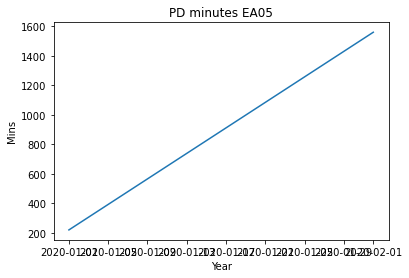

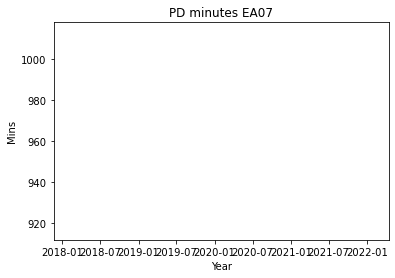

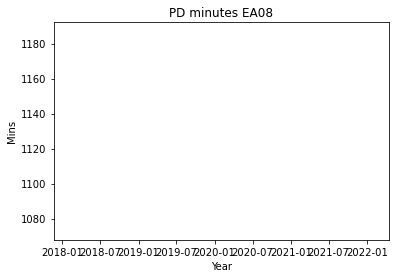

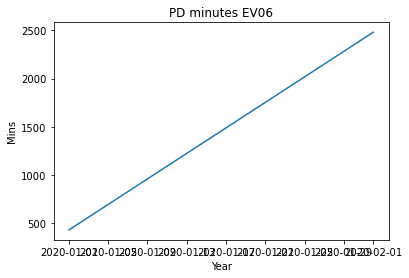

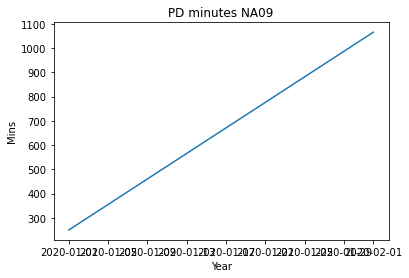

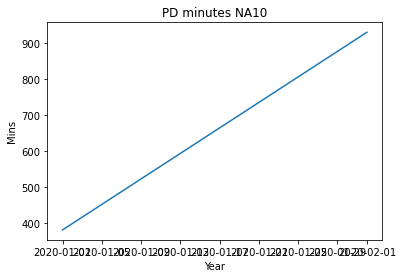

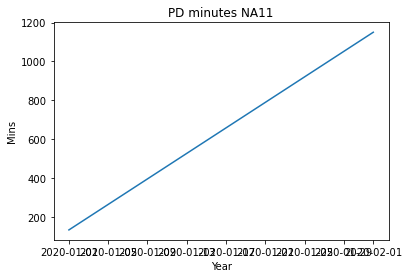

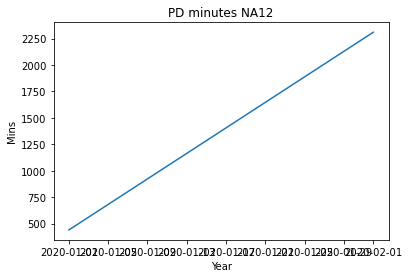

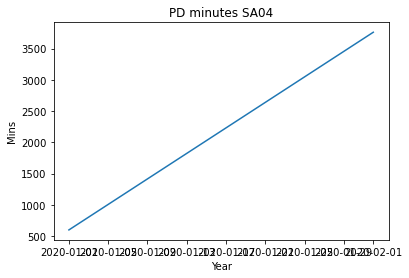

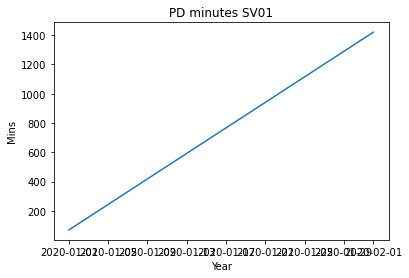

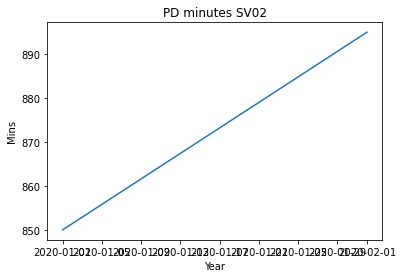

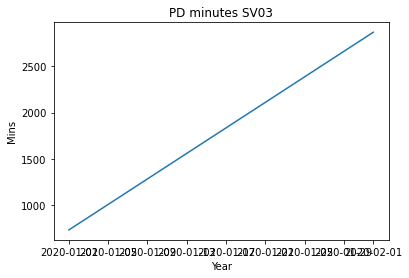

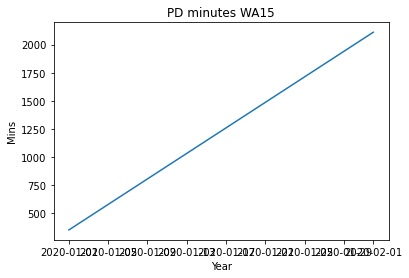

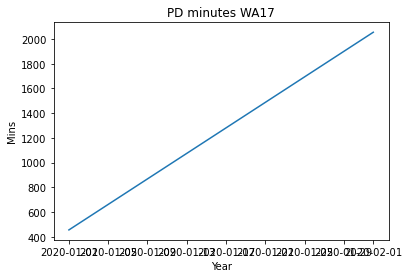

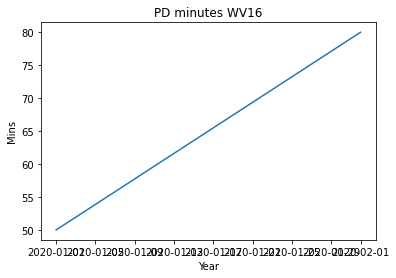

In [142]:
units = df_linac_recent['TxUnit_x'].unique()
for u in units:
    y = df_linac_recent[df_linac_recent['TxUnit_x']==u]['Duration']
    x = df_linac_recent[df_linac_recent['TxUnit_x']==u]['YearMonth_x']

    plt.plot(x, y)
    plt.xlabel('Year')
    plt.ylabel('Mins')
    plt.title('PD minutes '+u)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.show()
    